# Introduction:

This notebook is intended to show of the major functions of the IntelliShield package. No files produced in this notebook will be saved.

Currently this model can be run on both Google Colab and Jupyter Notebook.If you want a more comprehensive way to explore the full functionality of the IntelliShield package try running the files in the 'scripts' folder.

Since Notebooks and Colab save files differently the directory pathways are different. As such, for imports there will be two code blocks. Just run the one block that is specified for the environment you are using.

## Jupyter Notebook:

The Jupyter Notebook will run the code locally. This is the best option if you plan to eventually use the full script functionality.

How to set up the Jupyter Notebook:
<ol>
 <li>Create a virtual environment to run the notebook in. The requirements can be found in the 'requirements.txt' file.</li>
 <li>Download the main.ipynb file.</li>
 <li>Download the IntelliShield Package.</li>
</ol>

## Google Colab:

Google Colab will run the code on the browser. This is the best option if you want to explore the use cases of the IntelliShield package or if you lack the space to locally host/store the notebook.

How to set up Google Colab:
<ol>
 <li>Open Google Colab and click 'Open Notebook'.</li>
 <li>Click the 'GitHub' line and type in 'austineamonn/SummerResearch2024'.</li>
 <li>Open the main.ipynb notebook.</li>
</ol>

This image shows the above steps.

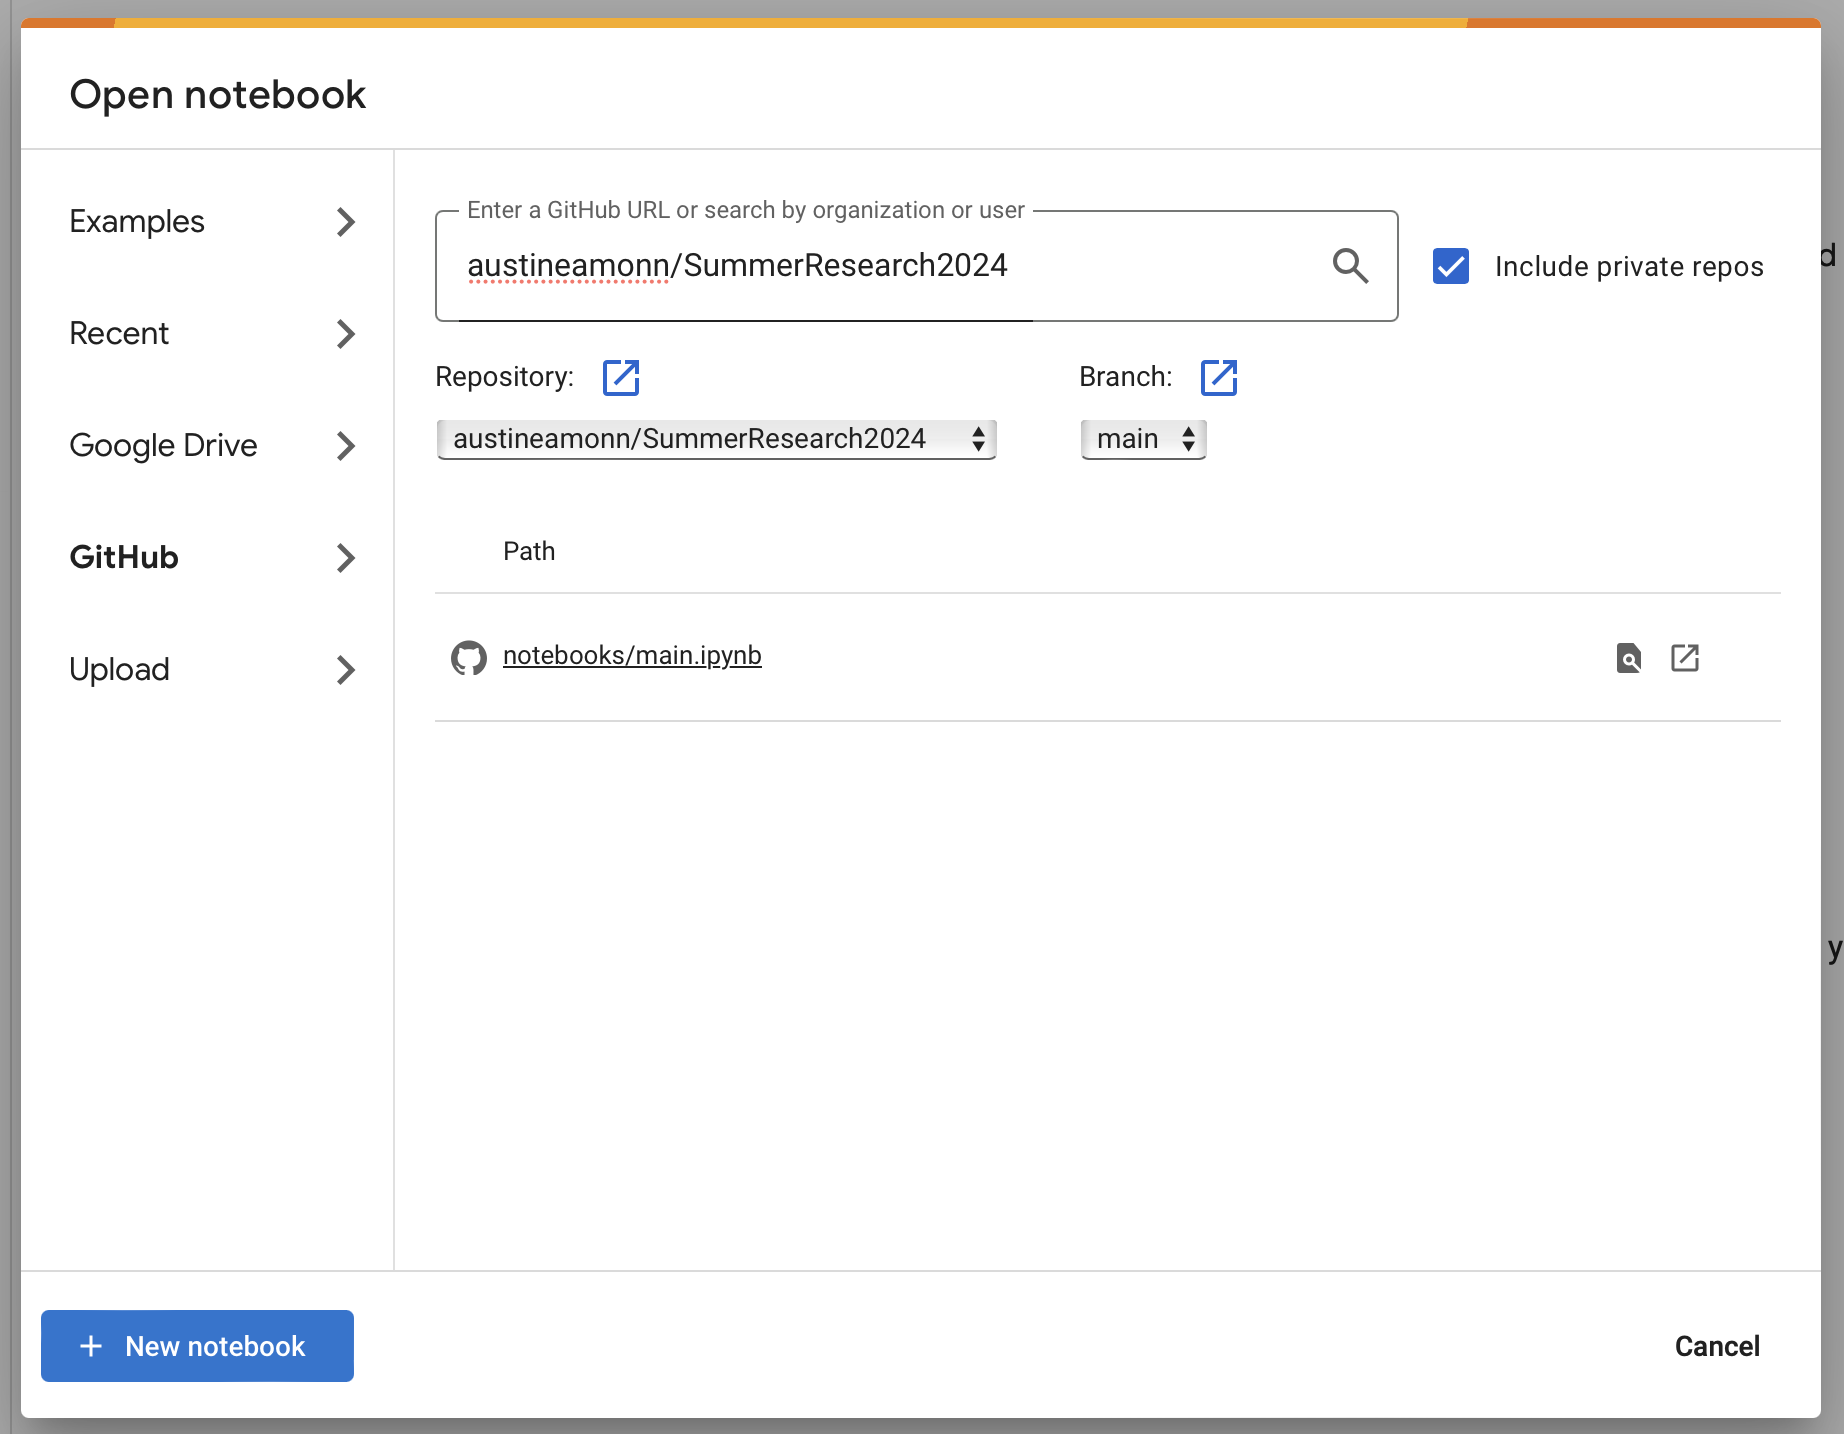

In [51]:
# Only run this for Google Colab

!git clone 'https://github.com/austineamonn/SummerResearch2024'
%pip install shap

Cloning into 'SummerResearch2024'...
remote: Enumerating objects: 22915, done.
remote: Counting objects: 100% (417/417), done.
remote: Compressing objects: 100% (304/304), done.
Receiving objects: 100% (22915/22915), 2.80 GiB | 27.15 MiB/s, done.
remote: Total 22915 (delta 130), reused 357 (delta 81), pack-reused 22498
Resolving deltas: 100% (3377/3377), done.
Updating files: 100% (174/174), done.
Note: you may need to restart the kernel to use updated packages.


Before we begin we have some standard python libraries to import that we will use throughout this notebook.

In [1]:
import pandas as pd
import time

# Data Generation:

There was no existing dataset that contained the data needed for this project. Thus first we must generate a synthetic dataset. The dataset will be generated based on a variety of real data, mappings between datasets, and artificially generated lists.

***

First we import the Data class which contains all the data needed to generate the synthetic dataset.

Then we import the DataGenerator class for the CPU. Note that a version does exist that runs on the GPU.

The following code tries to import the functions. If you get a 'ModuleNotFoundError' error then the GitHub was not properly downloaded or cloned.

In [2]:
# Expected pathway for local Jupyter Notebook
from IntelliShield.data_generation.data import Data
from IntelliShield.data_generation.data_generation_CPU import DataGenerator

In [53]:
# Expected pathway for Google Colab
from SummerResearch2024.src.IntelliShield.data_generation.data import Data
from SummerResearch2024.src.IntelliShield.data_generation.data_generation_CPU import DataGenerator

Next, we instantiate the Data and DataGenerator classes. The Data class allows us to access all the data needed to generate the synthetic dataset and the DataGenerator class allows us to use the functions needed to generate the synthetic dataset.

In [3]:
data = Data()
data_generator = DataGenerator(data)

What does the data look like? Some of the data is a list of values. Some lists were generated synthetically, others were pulled from various sources. More information can be found in the README file. Here is a list of learning styles:

In [4]:
data.learning_style()["learning_style_list"]

['Visual', 'Auditory', 'Read/Write', 'Kinesthetic']

Some of the data is a dictionary. Some dictionaries map different lists together while others map lists to demographic statistics on how common each item is. This dictionary maps the learning styles to the percentage of people that have said style.

In [5]:
data.learning_style()["learning_style"]

{'Visual': 27.27, 'Auditory': 23.56, 'Read/Write': 21.16, 'Kinesthetic': 28.01}

Now we use the generate_synthetic_dataset function to create a dataset from all the data. This function has two inputs:
- number of samples (an integer) which tell the function how many 'students' we want in our dataset
- batch size (an integer) which tells the function how to split up the work to prevent overloading the computer.
You can change the values if you want to generate more or less data. Be careful as higher values for number of samples will lead to a longer runtime.

In [6]:
num_samples = 100 # You can change these values if you want
batch_size = 10 # Batch size should be about 1/10 of the number of samples

Now we call the function. Use the time library to see how long the generator takes.

In [7]:
start_time = time.time()
synthetic_data = data_generator.generate_synthetic_dataset(num_samples, batch_size)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

13.09203314781189


'generate_synthetic_dataset' outputs a pandas dataframe. Let's examine the properties of the dataframe.

In [8]:
synthetic_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   first name                  100 non-null    object 
 1   last name                   100 non-null    object 
 2   ethnoracial group           100 non-null    object 
 3   gender                      100 non-null    object 
 4   international status        100 non-null    object 
 5   socioeconomic status        100 non-null    object 
 6   learning style              100 non-null    object 
 7   gpa                         94 non-null     float64
 8   student semester            100 non-null    int64  
 9   major                       100 non-null    object 
 10  previous courses            100 non-null    object 
 11  course types                100 non-null    object 
 12  course subjects             100 non-null    object 
 13  subjects of interest        100 non-

Lets look at the top 5 elements of the dataframe. You can look back at the README file to get a better sense of what each column contains and how it was generated.

In [9]:
synthetic_data.head(n=5) # Change n to larger numbers to see more rows of the dataframe

,first name,last name,ethnoracial group,gender,international status,socioeconomic status,learning style,gpa,student semester,major,previous courses,course types,course subjects,subjects of interest,extracurricular activities,career aspirations,future topics
0,Heran,Amed,African American or Black,Female,International,Near poverty,[Kinesthetic],3.68,13,[Communication Disorders Sciences And Services],"[Oral and Written Comm II, Intro to Contempora...","[[Lecture, Practice], [Practice], [Laboratory-...","[ASRM, FR, HIST, THEA, RHET, MSE, SHS, CHEM, E...","[Dance, Dance Theater, Speech and Hearing Scie...","[Education Society, Cultural Dance Club, Dance...","[Teacher Assistant, Elementary and Middle Scho...","[Performance Studies, Educational Psychology, ..."
1,Roman,Barkers,European American or white,Female,Domestic,Higher income,[Visual],3.79,11,[Social Work],"[English Diction, Skating Activities, The Scie...","[[Lecture, Practice], [Lecture], [Practice], [...","[SOCW, NRES, FR, HIST, SPAN, GGIS, SHS, CHEM, ...","[Languages, Gender and Women's Studies, Social...","[Symphony Orchestra, Social Work Club, Music C...","[Customer Service Representative, Musician, Si...","[Social Work, Music Theory, Sociology, Public ..."
2,Stevens,Wisham,African American or Black,Female,Domestic,Lower-middle income,[Kinesthetic],2.69,13,"[Medical Technologies Technicians, Clinical Ps...","[Electric Violin, Navigating Social Media, Gen...","[[Lecture, Practice], [Practice], [Laboratory-...","[SOCW, NPRE, NRES, MCB, LA, EPOL, THEA, SPAN, ...","[Public Health, Psychology, Music, Food Scienc...","[Political Science Club, Hospitality Managemen...","[Manager, Chief executive and legislator/publi...","[Medicine, Public Health, Psychology, Counseli..."
3,Violet,Kalantarova,European American or white,Female,Domestic,Higher income,[Kinesthetic],3.25,1,[],"[Undergraduate Open Seminar, Introductory Chem...","[[Online, Travel, Lecture-Discussion], [Lectur...","[CHEM, ENGL, BUS]","[Family Health, Health and Human Services, Agr...","[Sorority Council, Environmental Science Club,...","[Environmental Scientist and Geoscientist, Hea...","[Family Studies, Nutrition, Public Health, Med..."
4,Makia,Ebel,European American or white,Female,Domestic,Near poverty,[Visual],3.58,13,[Social Psychology],"[Bassoon, Theory of Arithmetic, Public Speakin...","[[Lecture, Practice], [Practice], [Discussion/...","[SOCW, NRES, AGED, FSHN, HIST, MCB, SPAN, CS, ...","[Environmental Science, Psychology, Global Stu...","[Psychology Club, Eco Club, Environmental Scie...","[Counselor, Therapist, Childcare Worker, Clini...","[Counseling Psychology, Education, Neuroscienc..."


Notice that we have columns that are lists and columns that are strings. Machine learning models need the input data to be numerical. Thus some data preprocessing is required.

# Data Preprocessing and Privatization:

We import the Preprocessing class to do the preprocessing work. The following code tries to import the functions. If you get a 'ModuleNotFoundError' error then the GitHub was not properly downloaded or cloned.

In [10]:
# Expected pathway for local Jupyter Notebook
from IntelliShield.data_preprocessing.preprocessing import PreProcessing

In [ ]:
# Expected pathway for Google Colab
from SummerResearch2024.src.IntelliShield.data_preprocessing.preprocessing import PreProcessing

Inside the Preprocessing class there are two functions that do the main preprocessing work:
- 'stringlist_to_binarylist': converts lists of strings into a binary list
- 'string_list_to_numberedlist': converts lits of strings into a numbered list.

Imagine the full options available are ['alice', 'bob', 'charlie']
Thus for the entry ['alice', 'charlie'] we get:
[1,0,1] for 'stringlist_to_binarylist'
[0,2] for 'string_list_to_numberedlist'

When we instantiate the class and call the 'preprocess_dataset' function both of the above functions will be called on certain columns. 'stringlist_to_binarylist' is called on 'learning styles' and 'string_list_to_numberedlist' is called on all the other lists.

In [11]:
preprocessor = PreProcessing(data)
start_time = time.time()
preprocessed_data = preprocessor.preprocess_dataset(synthetic_data)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

0.11463618278503418


'preprocess_dataset' outputs a pandas dataframe. What does the dataframe look like?

In [12]:
preprocessed_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   learning style              100 non-null    object 
 1   gpa                         94 non-null     float64
 2   student semester            100 non-null    int64  
 3   major                       100 non-null    object 
 4   previous courses            100 non-null    object 
 5   course types                100 non-null    object 
 6   course subjects             100 non-null    object 
 7   subjects of interest        100 non-null    object 
 8   extracurricular activities  100 non-null    object 
 9   career aspirations          100 non-null    object 
 10  future topics               100 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB


Lets look at the top 5 elements of the dataframe.

In [13]:
preprocessed_data.head(n=5) # Change n to larger numbers to see more rows of the dataframe

,learning style,gpa,student semester,major,previous courses,course types,course subjects,subjects of interest,extracurricular activities,career aspirations,future topics
0,"[0, 0, 0, 1]",3.68,13,[29],"[2363, 1764, 556, 2453, 3461, 2375, 1892, 1310...","[9, 0, 4, 13, 5, 10, 1, 2, 3, 11, 6, 20, 19]","[26, 85, 100, 162, 206, 136, 159, 46, 71, 5, 1...","[26, 57, 126, 1]","[71, 176, 167, 87, 15, 177, 172, 185, 173, 212...","[142, 50, 41, 138, 112, 94, 26, 131, 130, 101]","[126, 49, 48, 190, 39]"
1,"[1, 0, 0, 0]",3.79,11,[160],"[1077, 2889, 3204, 3338, 1313, 305, 2041, 627,...","[9, 0, 4, 5, 1, 2, 3, 20, 14]","[156, 216, 85, 100, 158, 90, 159, 46, 15, 71, ...","[24, 72, 117, 8, 11, 126]","[173, 120, 185, 184, 177, 60]","[40, 94, 136, 131, 38, 100, 64, 75]","[147, 119, 148, 134, 118]"
2,"[0, 0, 0, 1]",2.69,13,"[111, 26]","[991, 2292, 1313, 607, 2412, 1851, 2220, 271, ...","[9, 0, 4, 13, 5, 10, 1, 2, 3, 6, 20, 16, 14]","[156, 142, 216, 129, 116, 75, 162, 158, 52, 56...","[123, 10, 8, 67, 5, 20]","[43, 75, 60, 32, 63, 55, 51, 185, 172, 222, 16...","[82, 25, 145, 108, 98, 31, 124, 81, 50, 2, 30,...","[114, 134, 169, 171, 209]"
3,"[0, 0, 0, 1]",3.25,1,[],"[3338, 1928, 1311, 2089]","[0, 5, 1, 2, 3, 19, 15]","[46, 71, 40]","[64, 73, 41, 3]","[9, 79, 63]","[53, 66]","[65, 124, 134, 114, 81]"
4,"[1, 0, 0, 0]",3.58,13,[158],"[392, 3229, 2615, 2092, 1313, 3338, 2752, 1092...","[9, 0, 4, 13, 5, 10, 1, 2, 3, 7, 6, 20]","[156, 216, 11, 86, 100, 129, 158, 56, 206, 136...","[15, 10, 70, 8, 20, 24]","[32, 212, 79, 168, 63, 185, 120, 84, 184, 173,...","[38, 144, 26, 30, 53, 118, 44, 94, 124, 89, 66...","[171, 48, 122, 49, 169]"


Now that the data has been preprocessed we must privatize the data to keep it safe.

We import the Privatizer class to do this. The following code tries to import the functions. If you get a 'ModuleNotFoundError' error then the GitHub was not properly downloaded or cloned.

In [14]:
# Expected pathway for local Jupyter Notebook
from IntelliShield.data_privatization.privatization import Privatizer

In [15]:
# Expected pathway for Google Colab
from SummerResearch2024.src.IntelliShield.data_privatization.privatization import Privatizer

ModuleNotFoundError: No module named 'SummerResearch2024'

Here is a graphic of the privatization methods you can work with.

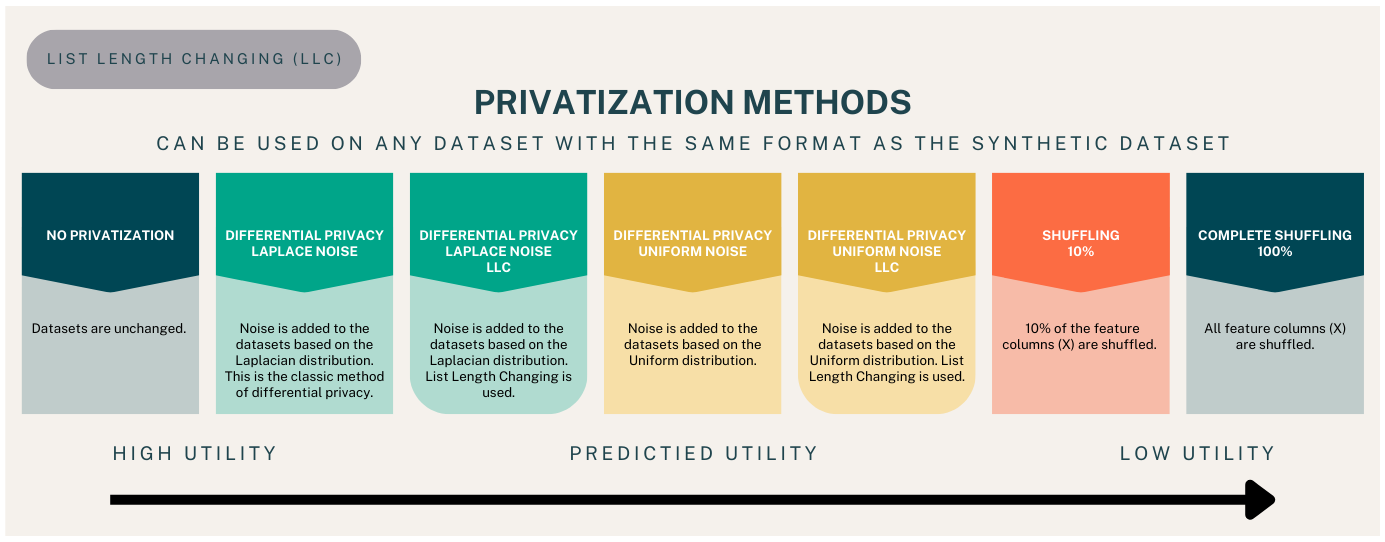

More details can be found in the README file. Let's try basic differential privacy with list lengthening.

In [16]:
privatization_type = 'basic differential privacy'
# Other 'privatization_type' options: 'uniform', 'shuffle', 'full shuffle' (full shuffle shuffles all of the rows)
privatizer = Privatizer(data, style=privatization_type, list_length=True)
# Can set 'list_length' to false if you don't want to allow the list sizes to change

Now we call 'privatize_dataset'. Use the time library to see how long the privatizer takes.

In [17]:
start_time = time.time()
privatized_data = privatizer.privatize_dataset(preprocessed_data)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

0.028317928314208984


'preprocess_dataset' outputs a pandas dataframe. Lets look at how the dataset is structured.

In [18]:
preprocessed_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   learning style              100 non-null    object 
 1   gpa                         94 non-null     float64
 2   student semester            100 non-null    int64  
 3   major                       100 non-null    object 
 4   previous courses            100 non-null    object 
 5   course types                100 non-null    object 
 6   course subjects             100 non-null    object 
 7   subjects of interest        100 non-null    object 
 8   extracurricular activities  100 non-null    object 
 9   career aspirations          100 non-null    object 
 10  future topics               100 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB


 Lets look at the top 5 elements of the dataframe.

In [19]:
privatized_data.head(n=5) # Change n to larger numbers to see more rows of the dataframe

,learning style,gpa,student semester,major,previous courses,course types,course subjects,subjects of interest,extracurricular activities
0,"[1, 0, 1, 0]",2.16,13,[128],"[2712, 3297, 548, 3452, 2881, 1103, 1834, 3199...","[15, 10, 17, 5, 2]","[145, 224, 74, 2, 196, 181, 28, 146]","[76, 100, 46, 82, 90, 70, 43, 45, 74, 125, 24,...","[217, 83, 233, 173, 233, 294, 66, 50, 91, 6, 2..."
1,"[1, 1, 1, 0]",3.13,7,"[124, 153]","[2729, 2570, 1946, 2337, 1294, 3061, 2170, 881...","[5, 11, 6, 10, 7, 3, 8, 11, 16, 17, 12, 5]","[136, 48, 172, 149, 40, 43, 58, 218, 8, 234, 5...","[123, 121, 128, 17, 137, 45, 73, 42, 93, 113, ...",[6]
2,"[1, 0, 1, 1]",2.10,13,[],"[2811, 692, 2823, 2944, 2654, 3464, 1970, 2148...","[11, 19, 13, 7, 15, 3, 6, 2, 13, 3, 14, 8, 10, 7]","[139, 200, 220, 190, 77, 90, 101, 136, 100, 14...","[128, 58, 88, 37, 51, 94, 108, 94, 120, 52, 11...","[126, 89, 21, 69, 4, 27, 219, 203, 256, 215, 3..."
3,"[0, 0, 0, 1]",2.95,2,"[42, 94]","[2886, 2535, 2945, 2264, 2324, 2297, 2327, 123...","[7, 9, 17, 20, 20, 4, 6, 19, 14, 20, 16, 15, 9...","[170, 82, 113, 31, 10, 128, 100, 192, 116, 7, ...","[29, 113, 71, 96, 55, 32, 138, 73, 78, 47, 1, ...",[]
4,"[0, 0, 1, 0]",3.36,5,[168],"[2836, 154, 387, 2057, 1315, 1598, 2538, 956, ...","[17, 12, 13, 10, 0, 6, 6, 2, 14, 15, 18]","[149, 209, 50, 194, 179]","[135, 75, 128, 34, 106, 42, 20, 9, 74, 83, 93,...","[5, 179, 32, 81, 221, 301, 217, 297, 213, 263,..."


## Dimensionality Reduction:

We still have the problem of long lists. The 'previous courses list' can be over 30 elements long! Thus we call a new function from the Preprocessor class, 'create_RNN_models'. Three different recurrent neural network models are used to reduce the dimension of each list to 1 element. The three networks are: Simple, GRU (Gated Recurrent Units), and LSTM (Long Term Short Memory).

Since 'create_RNN_models' takes in a dataframe, there is no need to create a new instance of the Preprocessor class. Thus we should call:
- 'privatized_data': reduce dimensionality
- 'preprocessed_data': give a null for comparison at the end
- 'preprocessed_data' with 'utility=True': reduce dimensionality of the utility columns

Let's also calculate and compare the runtimes.

In [20]:
# You can change the inputs so that a different model is set to 'True' to produce that model is

start_time = time.time()
privatized_data_reduced = preprocessor.create_RNN_models(privatized_data, simple=True, LSTM=False, GRU=False)
end_time = time.time()
runtime = end_time - start_time
print(f'Privatized data runtime: {runtime}')

start_time = time.time()
nonprivatized_data_reduced = preprocessor.create_RNN_models(preprocessed_data, simple=True, LSTM=False, GRU=False)
end_time = time.time()
runtime = end_time - start_time
print(f'Nonprivatized data runtime: {runtime}')

start_time = time.time()
utility_cols_reduced = preprocessor.create_RNN_models(preprocessed_data, utility=True, simple=True, LSTM=False, GRU=False)
end_time = time.time()
runtime = end_time - start_time
print(f'Utility columns runtime: {runtime}')

Epoch 1/10


2024-07-21 03:22:38.754493: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-07-21 03:22:38.754547: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-21 03:22:38.754557: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-21 03:22:38.754766: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-21 03:22:38.754792: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-07-21 03:22:39.522801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.3329
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0934
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1024
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0826
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1063
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0971
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0844
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.3389
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1498
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1270
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1104
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0928
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0846
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0718
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0674
Epoch 9/10
4

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 553ms/step - loss: 0.3868
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 489ms/step - loss: 0.1299
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - loss: 0.0815
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - loss: 0.0673
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step - loss: 0.0596
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step - loss: 0.0545
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 494ms/step - loss: 0.0468
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 494ms/step - loss: 0.0434
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - loss: 0.0389
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 488ms/step - loss: 0.0363
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.2545
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.1509
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.0592
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.0635
Epoch 5/10
4/4 ━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - loss: 0.0580
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - loss: 0.0642
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step - loss: 0.0571
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.2925
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.1114
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0689
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0516
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0388
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0283
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.0233
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0160
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0153
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0117
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.2781
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 

These functions output a list of dataframes. Although in this case we only produced the Simple RNN model. Regardless we need to take the first element from this list to get the actual dataframes.

In [21]:
privatized_data_reduced = privatized_data_reduced[0]
nonprivatized_data_reduced = nonprivatized_data_reduced[0]
utility_cols_reduced = utility_cols_reduced[0]

Now that we have the pandas dataframes. How are the dataframes structured?

In [22]:
print(privatized_data_reduced.info(verbose=True, show_counts=True))
print(nonprivatized_data_reduced.info(verbose=True, show_counts=True))
print(utility_cols_reduced.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   learning style              100 non-null    object 
 1   gpa                         94 non-null     float64
 2   student semester            100 non-null    int64  
 3   major                       100 non-null    object 
 4   previous courses            100 non-null    object 
 5   course types                100 non-null    object 
 6   course subjects             100 non-null    object 
 7   subjects of interest        100 non-null    object 
 8   extracurricular activities  100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      ---------

Lets look at the top 5 elements for each of the dataframes.

In [23]:
print(privatized_data_reduced.head(n=5))
print(nonprivatized_data_reduced.head(n=5))
print(utility_cols_reduced.head(n=5))
# Change n to larger numbers to see more rows of the dataframe

  learning style   gpa  student semester         major previous courses  \
0   [0.53845775]  2.16                13  [0.48920286]      [0.3397591]   
1    [0.5611903]  3.13                 7   [0.6273712]      [0.7478226]   
2   [0.56210667]  2.10                13  [0.57879186]     [0.18500647]   
3   [0.64359426]  2.95                 2   [0.9831048]     [0.80186903]   
4   [0.55000216]  3.36                 5   [0.5100712]     [0.24651891]   

   course types course subjects subjects of interest  \
0   [0.2874984]     [0.6835723]          [0.6160158]   
1   [0.6705434]     [0.4560407]         [0.14115408]   
2  [0.46549255]     [0.5352888]         [0.53375983]   
3  [0.48294848]     [0.7421486]          [0.6723745]   
4   [0.8040678]     [0.4178782]         [0.16832894]   

  extracurricular activities  
0                [0.5344158]  
1               [0.42718342]  
2                [0.9439059]  
3                [0.4212015]  
4                [0.5172714]  
  learning style   gpa  st

## Preprocess Private Columns:

Now let us calculate the private columns. First we import the PrivateColumns class from 'processing_private_columns'. he following code tries to import the functions. If you get a 'ModuleNotFoundError' error then the GitHub was not properly downloaded or cloned.

In [24]:
# Expected pathway for local Jupyter Notebook
from IntelliShield.data_preprocessing.processing_private_columns import PrivateColumns

In [ ]:
# Expected pathway for Google Colab
from SummerResearch2024.src.IntelliShield.data_preprocessing.processing_private_columns import PrivateColumns

Now we instantiate the Private Columns class.

In [25]:
private_cols_processor = PrivateColumns(data)

Now we call the 'get_private_cols' function on the class instance to process the private columns and turn the strings into numerical representations.

In [26]:
privacy_cols_df = private_cols_processor.get_private_cols(synthetic_data)

This function outputs a dataframe. Let's look at the dataframe structure.

In [27]:
privacy_cols_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ethnoracial group     100 non-null    object
 1   gender                100 non-null    object
 2   international status  100 non-null    object
 3   socioeconomic status  100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


Additionally, let's examine the top 5 rows of the dataframe.

In [28]:
privacy_cols_df.head(n=5)
# Change n to larger numbers to see more rows of the dataframe

,ethnoracial group,gender,international status,socioeconomic status
0,2,0,1,1
1,0,0,0,4
2,2,0,0,2
3,0,0,0,4
4,0,0,0,1


## Recombining Everything

Now we bring together the feature columns both nonprivatized and privatized with the utility and private columns. Let's specify the columns just to ensure that only the columns we want are in these datasets.

In [29]:
# Privatized Feature Data
privatized_data_reduced = privatized_data_reduced[['learning style','gpa','student semester','major','previous courses','course types','course subjects','subjects of interest','extracurricular activities']]

# Nonprivatized Feature Data
nonprivatized_data_reduced = nonprivatized_data_reduced[['learning style','gpa','student semester','major','previous courses','course types','course subjects','subjects of interest','extracurricular activities']]

# Utility Columns
utility_cols_reduced = utility_cols_reduced[['career aspirations','future topics']]

Now we will concatenate them together using pandas.

In [30]:
privatized_combined_df = pd.concat([privatized_data_reduced, utility_cols_reduced, privacy_cols_df], axis=1)
nonprivatized_combined_df = pd.concat([nonprivatized_data_reduced, utility_cols_reduced, privacy_cols_df], axis=1)

First we examine the structures of both datasets.

In [31]:
print(privatized_combined_df.info(verbose=True, show_counts=True))
print(nonprivatized_combined_df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   learning style              100 non-null    object 
 1   gpa                         94 non-null     float64
 2   student semester            100 non-null    int64  
 3   major                       100 non-null    object 
 4   previous courses            100 non-null    object 
 5   course types                100 non-null    object 
 6   course subjects             100 non-null    object 
 7   subjects of interest        100 non-null    object 
 8   extracurricular activities  100 non-null    object 
 9   career aspirations          100 non-null    object 
 10  future topics               100 non-null    object 
 11  ethnoracial group           100 non-null    object 
 12  gender                      100 non-null    object 
 13  international status        100 non-

Then we examine the top five entries of both datasets.

In [32]:
print(privatized_combined_df.head(n=5))
print(nonprivatized_combined_df.head(n=5))
# Change n to larger numbers to see more rows of the dataframe

  learning style   gpa  student semester         major previous courses  \
0   [0.53845775]  2.16                13  [0.48920286]      [0.3397591]   
1    [0.5611903]  3.13                 7   [0.6273712]      [0.7478226]   
2   [0.56210667]  2.10                13  [0.57879186]     [0.18500647]   
3   [0.64359426]  2.95                 2   [0.9831048]     [0.80186903]   
4   [0.55000216]  3.36                 5   [0.5100712]     [0.24651891]   

   course types course subjects subjects of interest  \
0   [0.2874984]     [0.6835723]          [0.6160158]   
1   [0.6705434]     [0.4560407]         [0.14115408]   
2  [0.46549255]     [0.5352888]         [0.53375983]   
3  [0.48294848]     [0.7421486]          [0.6723745]   
4   [0.8040678]     [0.4178782]         [0.16832894]   

  extracurricular activities career aspirations    future topics  \
0                [0.5344158]        [0.3474706]     [0.16265091]   
1               [0.42718342]       [0.14977252]     [0.46656415]   
2       

# Calculating Tradeoffs:

The reason for balancing the data privatization is to maximize the utility of the dataset while minimizing the privacy loss of the dataset. Perfectly private data would have no utility and vice versa.

Since our private columns are distinct classes, the privacy loss will be measured with accuracy where we want a low accuracy to keep the data safe. Meanwhile, after the RNNs our utility columns are essentially continuous. Thus utility gain will be measured with error where we want a low error to keep the data useful.

Our first test for this is the classifier decision tree. Since it is a classifier we will be using it to test privacy loss for the private columns. Import the ISDecisionTreeClassification class from 'tradeoffs'. Additionally, we import several functions as in the 'tradeoffs' file there are many shared functions that can be used across Model Class objects.

The following code tries to import the functions. If you get a 'ModuleNotFoundError' error then the GitHub was not properly downloaded or cloned.

In [33]:
# Expected pathway for local Jupyter Notebook
from IntelliShield.tradeoffs import ISDecisionTreeClassification, get_best_model, run_model, tree_plotter, confusion_matrix_plotter, calculate_shap_values, plot_shap_values, load_shap_values, get_feature_importance

In [ ]:
# Expected pathway for Google Colab
from SummerResearch2024.src.IntelliShield.tradeoffs import ISDecisionTreeClassification, get_best_model, run_model, tree_plotter, confusion_matrix_plotter, calculate_shap_values, plot_shap_values, load_shap_values, get_feature_importance

Let's pick which combination to test the classifier on.

In [34]:
privatization_type = 'Basic_DP' # 'NoPrivatization', 'Basic_DP', 'Basic_DP_LLC', 'Uniform', 'Uniform_LLC', 'Shuffling', 'Complete_Shuffling'
RNN_model = 'Simple1' # 'GRU1', 'LSTM1', 'Simple1'
target = 'ethnoracial group' # 'ethnoracial group', 'gender', 'international status', 'socioeconomic status'

Initate the ISDecisionTreeClassification class.

In [35]:
privatized_classifier = ISDecisionTreeClassification(privatization_type, RNN_model, target, privatized_combined_df)

Next we use cost complexity pruning (ccp) to get the best Decision Tree model and it's acompanying ccp_alpha. The model is trained on just a small subset of the data. This function will print out several figures comparing various factors to alpha values.

<ol>
    <li>The first figure compares impurities with ccp alpha.</li>
    <li>The second figure compares tree nodes and depth with ccp alpha.</li>
    <li>The third figure compares accuracy with ccp alpha.</li>
</ol>

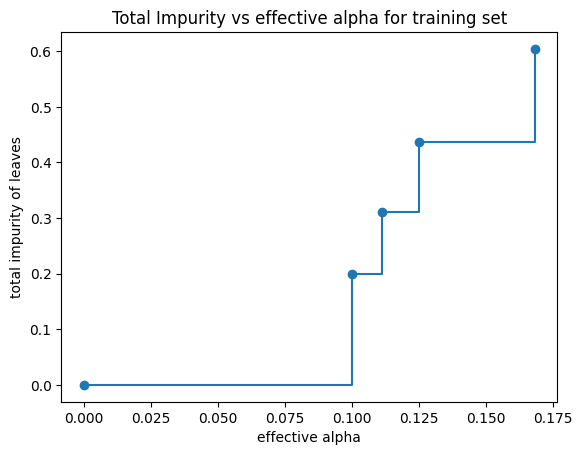

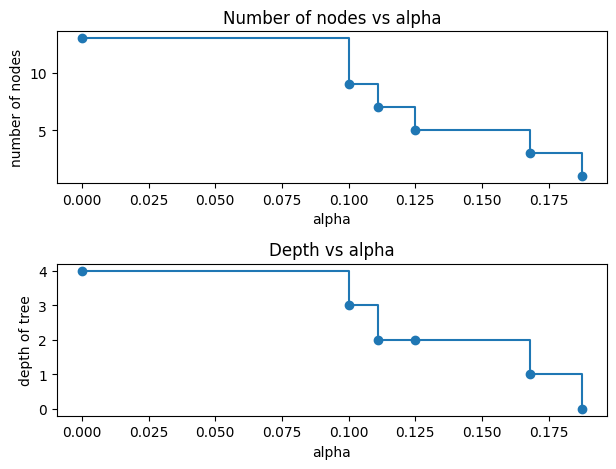

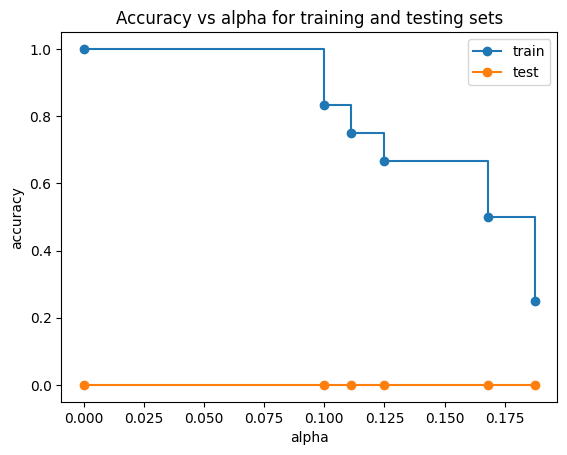

This is what a model object looks like: DecisionTreeClassifier(random_state=0)
This is the model's ccp alpha value: 0.0


In [36]:
best_model, ccp_alpha = get_best_model(privatized_classifier, save_model=False, show_fig=True, save_fig=False, return_model=True, return_ccp_alpha=True)
print(f'This is what a model object looks like: {best_model}')
print(f"This is the model's ccp alpha value: {ccp_alpha}")

Next, we use this best model and run a full model on all the data. This also prints the model's classification report.

In [37]:
run_model(privatized_classifier, best_model, ccp_alpha, print_report=True, save_files=False)

                                  precision    recall  f1-score   support

      European American or white       0.00      0.00      0.00       1.0
             Latino/a/x American       0.00      0.00      0.00       0.0
       African American or Black       0.00      0.00      0.00       0.0
                  Asian American       0.00      0.00      0.00       1.0
                     Multiracial       0.00      0.00      0.00       1.0
American Indian or Alaska Native       0.00      0.00      0.00       0.0
                Pacific Islander       0.00      0.00      0.00       0.0

                        accuracy                           0.00       3.0
                       macro avg       0.00      0.00      0.00       3.0
                    weighted avg       0.00      0.00      0.00       3.0



Next we plot the first two splits of the best model.

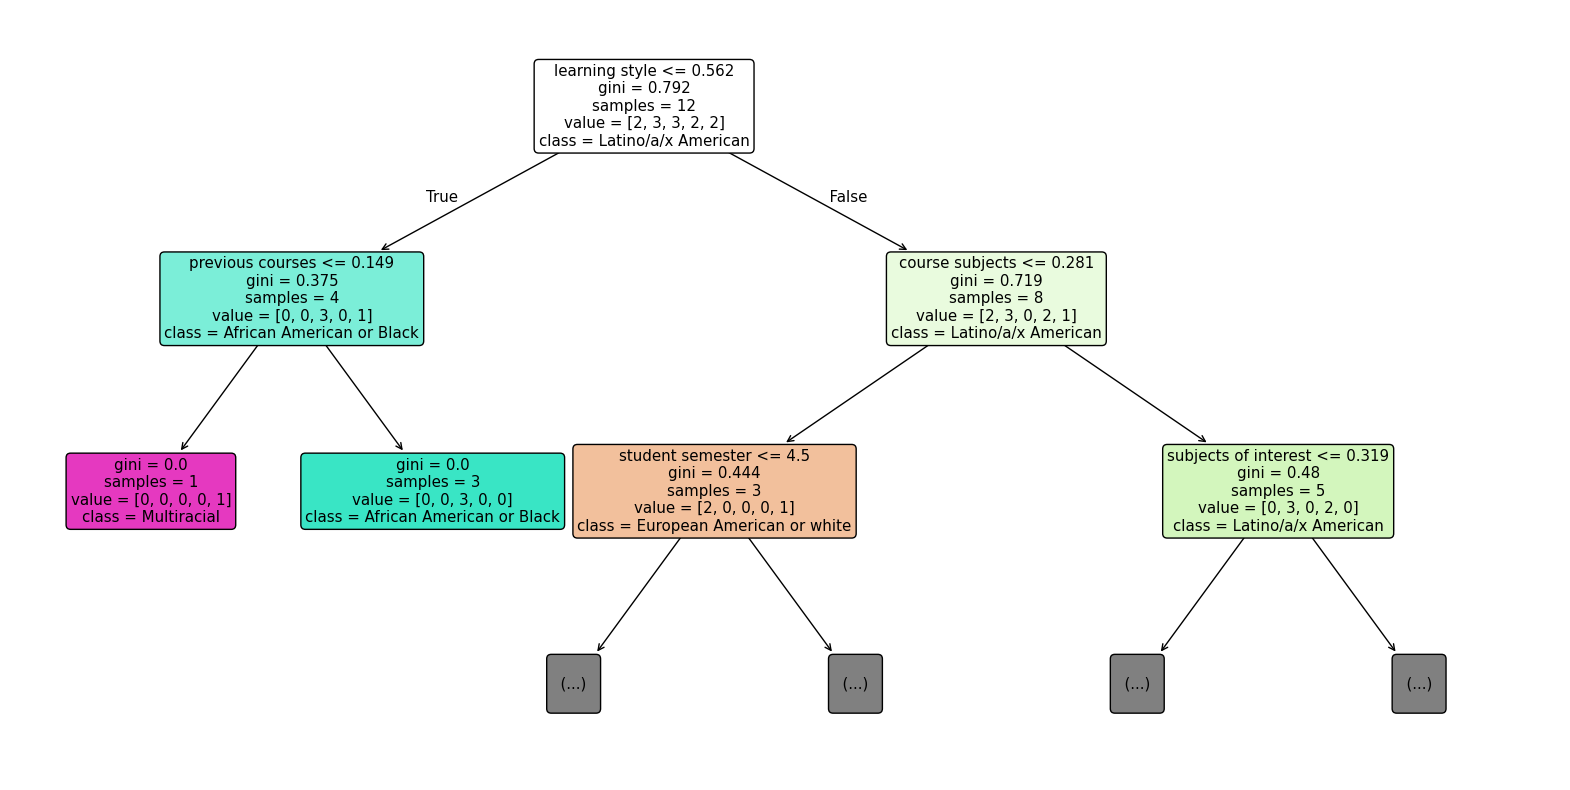

In [38]:
tree_plotter(privatized_classifier, save_fig=False, show_fig=True, max_depth=2) # Change max_depth to generate a tree with more splits

Then we calculate and plot the confusion matrix for the model.

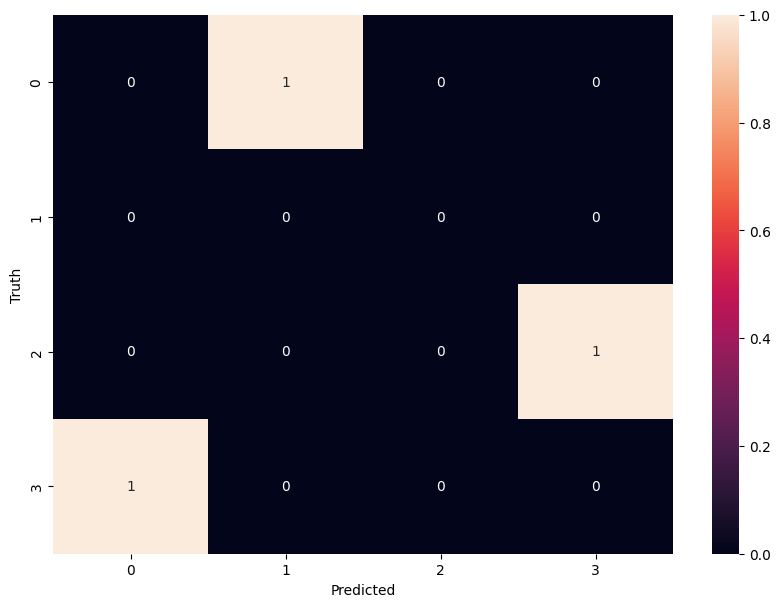

In [39]:
confusion_matrix_plotter(privatized_classifier, show_fig=True)

The following cells are under construction and do not yet work.

In [60]:
import shap

In [96]:
shap_values = calculate_shap_values(privatized_classifier, return_values=True, save_values=False)

In [97]:
privatized_classifier.shap_is_list = False

In [99]:
# Assuming 'shap_values_explanation' is your Explanation object
values_3d = shap_values.values
base_values_3d = shap_values.base_values
data_3d = shap_values.data

In [101]:
print(values_3d.shape)
print(base_values_3d.shape)
print(data_3d.shape)

(15, 9, 5)
(15, 5)
(15, 9)


In [102]:
print(values_3d.shape[0])
print(values_3d.shape[1])
print(values_3d.shape[2])

15
9
5


In [75]:
privatized_classifier.shap_explainer_list = []

for i in range(len(values_3d.shape[0])):
    # Extract the SHAP values, base values, and data
    values = []
    base_values = []
    data = []
    for j in range(len(values_3d.shape[0])):
        elem_values = []
        elem_data = []
        for item in range(len(_)):
            elem_values.append(shap_values.values[item][i])
            elem_data.append(shap_values.data[item][i])
        values.append(elem_values)
        base_values.append(shap_values.base_values[0][i])
        data.append(elem_data)

    # Convert lists to numpy arrays
    values = np.array(values)
    base_values = np.array(base_values)
    data = np.array(data)

    # Create an Explanation object
    shap_value_explainer = shap.Explanation(values=values,base_values=base_values, data=data, feature_names=privatized_classifier.X_columns)

    # Add object to list of explainers, one per target
    privatized_classifier.shap_explainer_list.append(shap_value_explainer)

print(privatized_classifier.shap_explainer_list)

IndexError: index 5 is out of bounds for axis 0 with size 5

In [69]:
#shap_values = shap.Explanation(values=shap_values.values,base_values=shap_values.base_values, data=shap_values.data, feature_names=privatized_classifier.X_columns)
print(shap_values)

.values =
array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.09722222,  0.        ,  0.        ,  0.        ,
          0.09722222],
        [ 0.02777778,  0.22083333, -0.29166667,  0.05      ,
         -0.00694444],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.04166667,  0.        ,
         -0.04166667],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.09722222,  0.25416667,  0.        ,  0.05833333,
         -0.21527778],
        [ 0.        ,  0.275     ,  0.        , -0.275     ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.04861111,  0.        ,  0.        ,  0.        ,
         -0.04861111],
        [ 0.04861111,  0.22083333, -0.29166667,  0.05      ,
   

In [85]:
# Extract the values from the SHAP object
shap_values_array = shap_values.values

# Convert to a numpy array if not already one
if not isinstance(shap_values_array, np.ndarray):
    shap_values_array = np.array(shap_values_array)

# Check the shape to confirm
print(shap_values_array.shape)

(15, 9, 5)


In [86]:
# Sum across the last dimension
shap_values_2d = np.sum(shap_values_array, axis=2)

# Check the new shape of SHAP values
print(shap_values_2d.shape)  # Should be (15, 9)

(15, 9)


TypeError: 'numpy.float64' object is not iterable

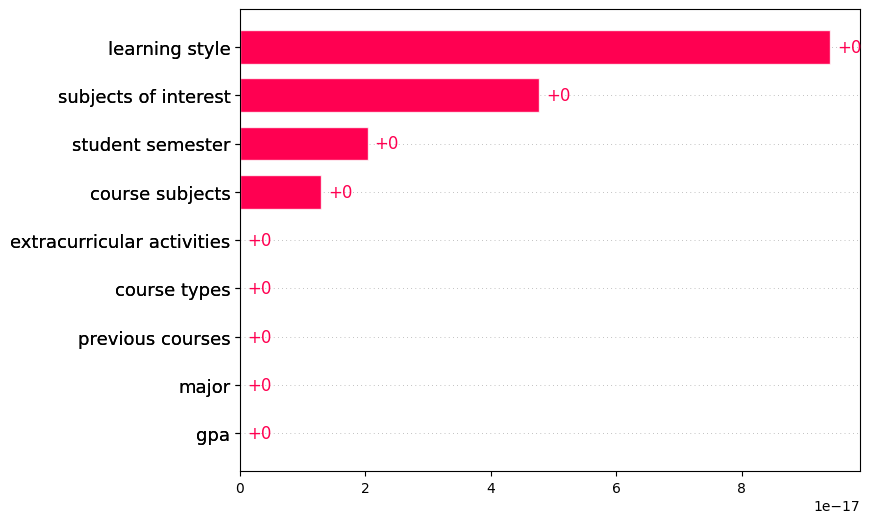

In [95]:
plot_shap_values_one_target(privatized_classifier, shap_values=shap_values_explanation, classname=None, save_figs=False)

In [94]:
import shap

# Assuming feature_names is available and correct
#feature_names = shap_values.feature_names if hasattr(shap_values, 'feature_names') else [f"Feature {i}" for i in range(shap_values_2d.shape[1])]

# Create an Explanation object
shap_values_explanation = shap.Explanation(
    values=shap_values_2d,
    base_values=np.mean(shap_values.base_values, axis=1),  # Adjusting base values if necessary
    data=shap_values.data[:, 0],  # Assuming we use the first target's data
    feature_names=privatized_classifier.X_columns
)

# Verify the Explanation object
print(shap_values_explanation)


.values =
array([[ 0.00000000e+00,  2.77555756e-17,  9.02056208e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  0.00000000e+00],
       [ 0.00000000e+00,  6.93889390e-18,  9.02056208e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  0.00000000e+00],
       [ 0.00000000e+00,  6.93889390e-18,  6.93889390e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  0.00000000e+00],
       [ 0.00000000e+00,  6.93889390e-18,  9.02056208e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.38777878e-17,  5.55111512e-17,  0.00000000e+00],
       [ 0.00000000e+00,  2.77555756e-17,  1.94289029e-16,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.16333634e-17, -6.93889390e-18,  0.00000000e+00],
       [ 0.00000000e+00,  6.93889390e-18,  9.02056208e-17,
         0.00000000e+00,  0.00000000e+00,

In [73]:
import numpy as np

In [92]:
synthetic_data.head(n=100)

,first name,last name,ethnoracial group,gender,international status,socioeconomic status,learning style,gpa,student semester,major,previous courses,course types,course subjects,subjects of interest,extracurricular activities,career aspirations,future topics
0,Heran,Amed,African American or Black,Female,International,Near poverty,[Kinesthetic],3.68,13,[Communication Disorders Sciences And Services],"[Oral and Written Comm II, Intro to Contempora...","[[Lecture, Practice], [Practice], [Laboratory-...","[ASRM, FR, HIST, THEA, RHET, MSE, SHS, CHEM, E...","[Dance, Dance Theater, Speech and Hearing Scie...","[Education Society, Cultural Dance Club, Dance...","[Teacher Assistant, Elementary and Middle Scho...","[Performance Studies, Educational Psychology, ..."
1,Roman,Barkers,European American or white,Female,Domestic,Higher income,[Visual],3.79,11,[Social Work],"[English Diction, Skating Activities, The Scie...","[[Lecture, Practice], [Lecture], [Practice], [...","[SOCW, NRES, FR, HIST, SPAN, GGIS, SHS, CHEM, ...","[Languages, Gender and Women's Studies, Social...","[Symphony Orchestra, Social Work Club, Music C...","[Customer Service Representative, Musician, Si...","[Social Work, Music Theory, Sociology, Public ..."
2,Stevens,Wisham,African American or Black,Female,Domestic,Lower-middle income,[Kinesthetic],2.69,13,"[Medical Technologies Technicians, Clinical Ps...","[Electric Violin, Navigating Social Media, Gen...","[[Lecture, Practice], [Practice], [Laboratory-...","[SOCW, NPRE, NRES, MCB, LA, EPOL, THEA, SPAN, ...","[Public Health, Psychology, Music, Food Scienc...","[Political Science Club, Hospitality Managemen...","[Manager, Chief executive and legislator/publi...","[Medicine, Public Health, Psychology, Counseli..."
3,Violet,Kalantarova,European American or white,Female,Domestic,Higher income,[Kinesthetic],3.25,1,[],"[Undergraduate Open Seminar, Introductory Chem...","[[Online, Travel, Lecture-Discussion], [Lectur...","[CHEM, ENGL, BUS]","[Family Health, Health and Human Services, Agr...","[Sorority Council, Environmental Science Club,...","[Environmental Scientist and Geoscientist, Hea...","[Family Studies, Nutrition, Public Health, Med..."
4,Makia,Ebel,European American or white,Female,Domestic,Near poverty,[Visual],3.58,13,[Social Psychology],"[Bassoon, Theory of Arithmetic, Public Speakin...","[[Lecture, Practice], [Practice], [Discussion/...","[SOCW, NRES, AGED, FSHN, HIST, MCB, SPAN, CS, ...","[Environmental Science, Psychology, Global Stu...","[Psychology Club, Eco Club, Environmental Scie...","[Counselor, Therapist, Childcare Worker, Clini...","[Counseling Psychology, Education, Neuroscienc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Rin,Pettigrew,European American or white,Female,Domestic,Middle income,[Kinesthetic],3.72,9,[Linguistics And Comparative Language And Lite...,"[Intro Computing: Non-Tech, Introductory Chemi...","[[Lecture, Practice], [Lecture], [Discussion/R...","[ASRM, CHLH, LA, SPAN, EPSY, CS, SE, CHEM, ENG...","[Physics, Aerospace Engineering, Engineering, ...","[Education Society, Linguistics Club, Language...","[Elementary and Middle School Teacher, Chemist...","[Linguistics, Aerospace Engineering, Biomedica..."
96,Twila,Seyferth,European American or white,Nonbinary,Domestic,Middle income,[Visual],3.04,9,[Educational Psychology],[Undergraduate Open Seminar in Computer Scienc...,"[[Practice], [Discussion/Recitation, Online Le...","[NRES, CHLH, ARTD, LA, SPAN, EPSY, RST, CS, AN...","[Biology, Psychology, Music, Communications, E...","[Psychology Club, Education Society, Public Re...","[Secondary School Teacher, Construction Manage...","[Sound Engineering, Music Theory, Dance Theate..."
97,Kelly,Londrie,European American or white,Male,Domestic,Near poverty,[Auditory],NaN,0,[Studio Arts],[],[],[],[Art],"[Business Club, Art Club]","[Designer, Retail Salesperson, Artist and Rela...","[Theater, Film and Media Studies, Dance, Graph..."
98,Tekoa,Vrettos,Asian American,Mal

In [76]:
privatized_classifier.classnames

['European American or white',
 'Latino/a/x American',
 'African American or Black',
 'Asian American',
 'Multiracial',
 'American Indian or Alaska Native',
 'Pacific Islander']

In [81]:
from IntelliShield.tradeoffs import plot_shap_values_one_target

In [83]:
# Inspect the SHAP values object to understand its structure
print(shap_values.shape)
print(shap_values)

(15, 9, 5)
.values =
array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.09722222,  0.        ,  0.        ,  0.        ,
          0.09722222],
        [ 0.02777778,  0.22083333, -0.29166667,  0.05      ,
         -0.00694444],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.04166667,  0.        ,
         -0.04166667],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.09722222,  0.25416667,  0.        ,  0.05833333,
         -0.21527778],
        [ 0.        ,  0.275     ,  0.        , -0.275     ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.04861111,  0.        ,  0.        ,  0.        ,
         -0.04861111],
        [ 0.04861111,  0.22083333, -0.29166667,  0.05

In [79]:
plot_shap_values(privatized_classifier, shap_explainer_list=shap_values)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (9,) + inhomogeneous part.

In [ ]:
load_shap_values(classifier, f'../outputs/examples/notebook_files/shap_values.npy')
plot_shap_values(classifier)

In [104]:
get_feature_importance(privatized_classifier, save_values=False)

ValueError: Per-column arrays must each be 1-dimensional

# Comparing Models: